In [2]:
import os
import zipfile
import tensorflow as tf
os.getcwd()
#os.chdir("/Users/root1/Documents/Coursera DeepLearning/Course2/dogs-vs-cats/train")
#os.getcwd()

'/Users/root1/Documents/Coursera DeepLearning/Course2'

In [3]:
base_dir = "/Users/root1/Documents/Coursera DeepLearning/Course2/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir,'train')
#os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')

test_dir = os.path.join(base_dir,'test')
#test_dir=os.path.join(base)

In [4]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>=0.75):
                print("\nReached 75% accuracy so cancelling training!")
                self.model.stop_training = True
callbacks=myCallback()

In [5]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [6]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_steps=50,

                    verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 [==============================] - 22s 217ms/step - loss: 0.7635 - accuracy: 0.5540 - val_loss: 0.6752 - val_accuracy: 0.5390
Epoch 2/10
100/100 [==============================] - 21s 209ms/step - loss: 0.6246 - accuracy: 0.6645 - val_loss: 0.7361 - val_accuracy: 0.6130
Epoch 3/10
100/100 [==============================] - 21s 213ms/step - loss: 0.5443 - accuracy: 0.7365 - val_loss: 0.5557 - val_accuracy: 0.7180
Epoch 4/10
100/100 [==============================] - 22s 216ms/step - loss: 0.4579 - accuracy: 0.7955 - val_loss: 0.6317 - val_accuracy: 0.6810
Epoch 5/10
100/100 [==============================] - 22s 222ms/step - loss: 0.3901 - accuracy: 0.8175 - val_loss: 0.5513 - val_accuracy: 0.7130
Epoch 6/10
100/100 [==============================] - 24s 241ms/step - loss: 0.3133 - accuracy: 0.8595 - val_loss: 0.8667 - val_accuracy: 0.6270
Epoch 7/10
100/100 [=================

dog.18.jpgis a dog


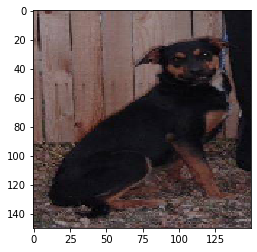

dog.19.jpgis a dog


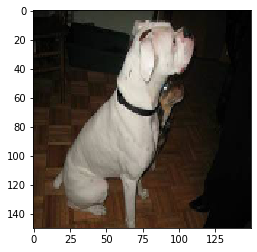

cat.2009.jpgis a dog


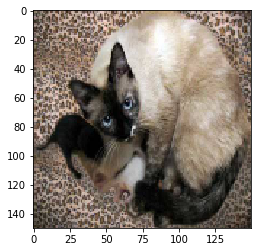

cat.2008.jpgis a cat


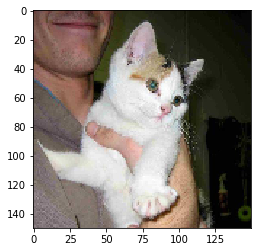

dog.7.jpgis a dog


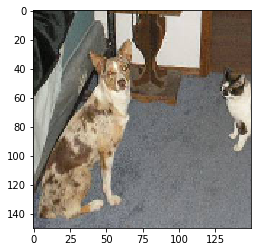

dog.6.jpgis a dog


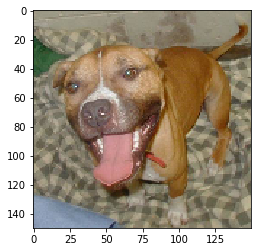

dog.5.jpgis a dog


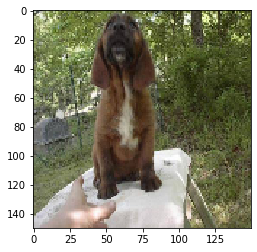

cat.2000.jpgis a cat


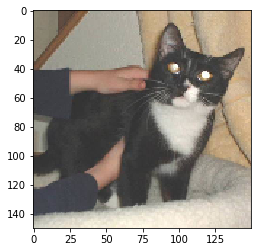

cat.2014.jpgis a cat


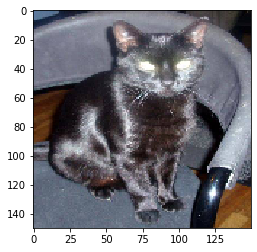

dog.8.jpgis a dog


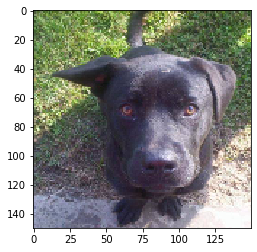

dog.9.jpgis a dog


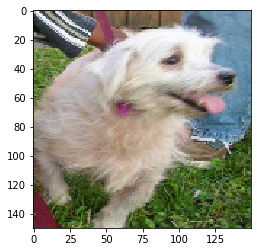

cat.2001.jpgis a cat


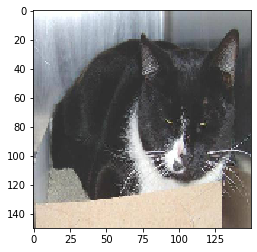

cat.2003.jpgis a cat


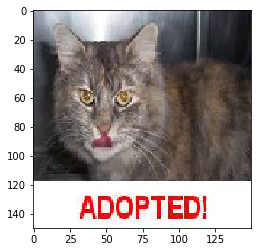

cat.2002.jpgis a dog


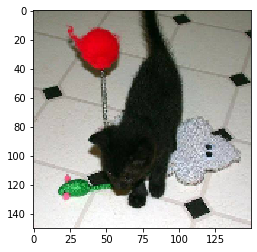

cat.2012.jpgis a dog


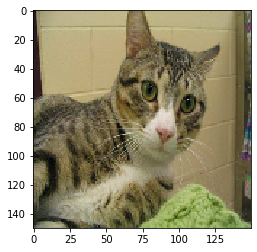

cat.2006.jpgis a dog


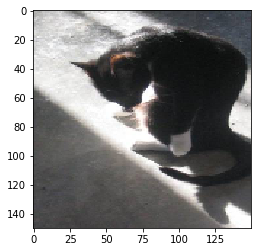

cat.2007.jpgis a cat


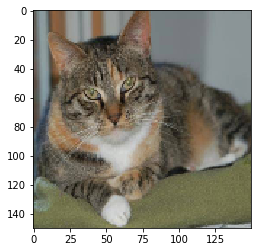

cat.2013.jpgis a cat


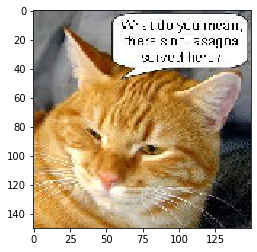

cat.2005.jpgis a cat


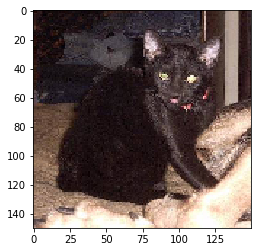

cat.2011.jpgis a cat


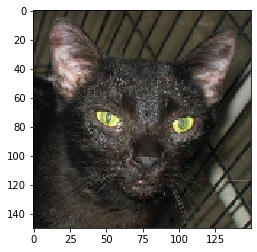

cat.2010.jpgis a dog


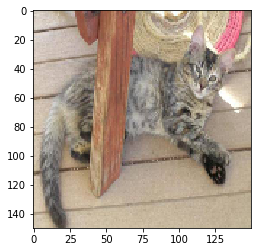

cat.2004.jpgis a cat


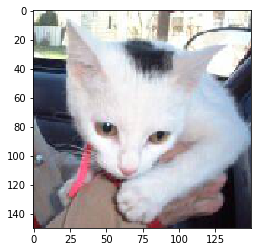

dog.17.jpgis a dog


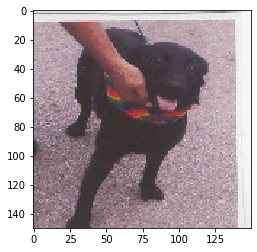

dog.16.jpgis a dog


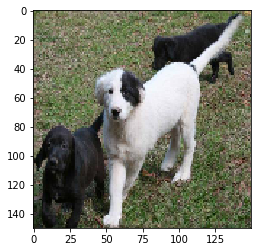

dog.14.jpgis a dog


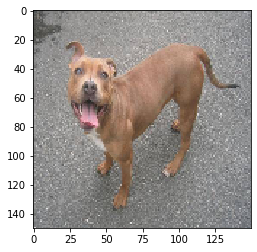

dog.15.jpgis a dog


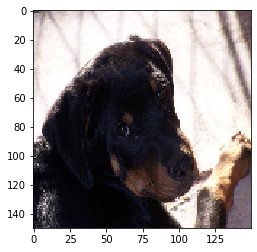

dog.11.jpgis a dog


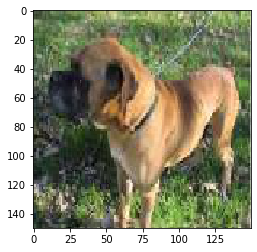

dog.10.jpgis a dog


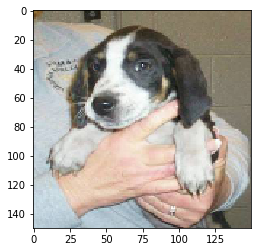

dog.12.jpgis a dog


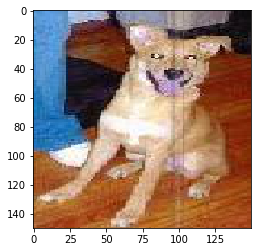

dog.13.jpgis a dog


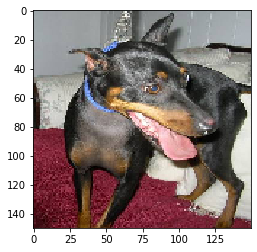

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
for fn in os.listdir(test_dir):
        path=os.path.join(test_dir,fn)
        img=image.load_img(path,target_size=(150,150))
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        images = np.vstack([x])
        classes = model.predict(images,batch_size=10)
        plt.imshow(img)
        if classes[0]>0:
            
            print(fn + "is a dog")
            plt.imshow(img)
            plt.show()
        else:
        
            print(fn+"is a cat")
            plt.imshow(img)
            plt.show()
#path=test_dir + fn


        
        



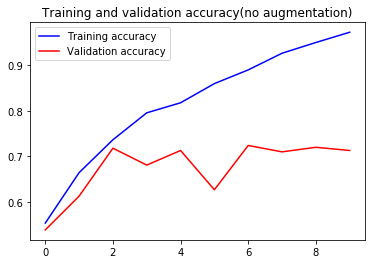

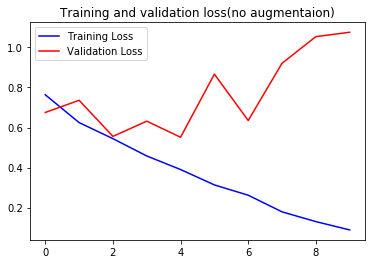

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy(no augmentation)')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'blue', label='Training Loss')
plt.plot(epochs, val_loss, 'red', label='Validation Loss')
plt.title('Training and validation loss(no augmentaion)')
plt.legend()

plt.show()

In [11]:
#Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest' )
test_datagen  = ImageDataGenerator( rescale=1/255)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history2 = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_steps=50,

                    verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 [==============================] - 27s 275ms/step - loss: 0.6452 - accuracy: 0.6560 - val_loss: 0.5716 - val_accuracy: 0.7040
Epoch 2/10
100/100 [==============================] - 28s 282ms/step - loss: 0.6020 - accuracy: 0.6900 - val_loss: 0.5756 - val_accuracy: 0.7200
Epoch 3/10
100/100 [==============================] - 29s 285ms/step - loss: 0.6050 - accuracy: 0.6840 - val_loss: 0.5710 - val_accuracy: 0.7200
Epoch 4/10
100/100 [==============================] - 30s 299ms/step - loss: 0.5953 - accuracy: 0.6940 - val_loss: 0.5507 - val_accuracy: 0.7130
Epoch 5/10
100/100 [==============================] - 29s 293ms/step - loss: 0.5999 - accuracy: 0.6785 - val_loss: 0.5301 - val_accuracy: 0.7430
Epoch 6/10
100/100 [==============================] - 29s 295ms/step - loss: 0.5821 - accuracy: 0.7090 - val_loss: 0.5305 - val_accuracy: 0.7370
Epoch 7/10
100/100 [=================

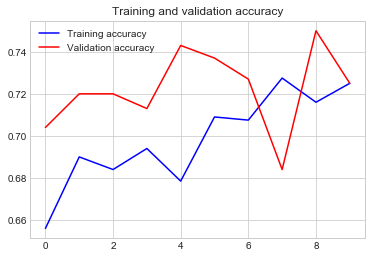

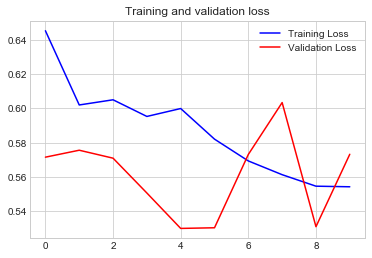

In [13]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.style.use('seaborn-whitegrid')

epochs = range(len(acc))

plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'blue', label='Training Loss')
plt.plot(epochs, val_loss, 'red', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()